## Classification
- We will explore MNIST dataset provided by sklearn to classify digits handwritten by humans
- MNIST dataset is 'Hello World' of Machine Learning so you will encounter this dataset somehow in your journey
- Shape of this dataset is around 70K with 784 features (each image is 28X28 size)
- This is 2D numpy array where single vector represents intensities of pixels of image within range (0 white - 255 black)

In [38]:
# import statements
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# loading dataset - as this is image dataset which wont be suitable for dataframes so it makes sense to load it as_frame=False
mnist = fetch_openml('mnist_784', as_frame=False)

### Exploring Dataset

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
# fetching data & target from bunch
X, y = mnist.data, mnist.target

In [5]:
print(f"Shape of X : {X.shape} & y: {y.shape}")

Shape of X : (70000, 784) & y: (70000,)


In [6]:
def show_digit(_array):
    """This function displays each digit in MNIST dataset"""
    array = _array.reshape(28, 28) # reshaping pixels to be plotted
    #print(array)
    plt.imshow(array, cmap="gray")

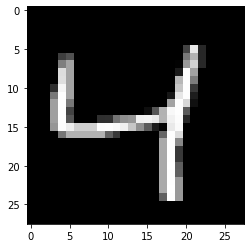

In [7]:
show_digit(X[2])

In [8]:
# check the target set
y[2]

'4'

In [9]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

### Binary Classifier & metrics
- Lets form the binary classifier to classify any digit (for example: 4) or non_4 digit
- Compare the performance of binary classifier with dummy model
- Accuracy is not preferred metrics for classifiers

In [10]:
y_only_4 = (y_train == '4')

In [11]:
y_only_4.shape

(60000,)

In [12]:
clf = SGDClassifier()
clf.fit(X_train, y_only_4)

SGDClassifier()

In [13]:
clf.predict([X[2]])

array([ True])

In [16]:
# this accuracy looks pretty promising
cross_val_score(clf, X_train, y_only_4, cv=3, scoring="accuracy")

array([0.9781 , 0.97775, 0.97025])

In [18]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_only_4)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_only_4, cv=3, scoring="accuracy")

array([0.90265, 0.90265, 0.9026 ])

In [28]:
# only around 10% of data contains 4. Meaning 90% is non 4s so classifier will have atleast 
# 90% of accuracy which the dummy classifier is producing
round(len(y_train[y_train == '4'])/ len(y_train)*100, 2)

9.74

In [32]:
# instead of having accuracy scores lets have the predictions
y_train_pred = cross_val_predict(clf, X_train, y_only_4, cv=3)

In [35]:
# lets build the confusion matrix
# 53310 - True Negative -> correctly classifed as non 4s
# 848 - False Positives -> incorrectly classifed as 4s -> Type I error
# 936 - False Negative -> incorrectly classied as non 4s -> Type II error
# 4906 - True Positives -> correctly classified as 4s
cm = confusion_matrix(y_only_4, y_train_pred)
cm

array([[53310,   848],
       [  936,  4906]])

### Precision & Recall

In [36]:
precision_score(y_only_4, y_train_pred) # TP / (TP + FP)

0.8526242613833854

In [37]:
recall_score(y_only_4, y_train_pred) # TP / (TP + FN)

0.8397808969530982

In [40]:
f1_score(y_only_4, y_train_pred) # 2 x precision x recall / (precision + recall)

0.8461538461538461